<a href="https://colab.research.google.com/github/R1sh11172/PyTorch_Deep_Proj/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Full example of PyTorch end-to-end workflow.

Resources:
* Github - https://github.com/mrdbourke/pytorch-deep-learning
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
import torch
from torch import nn # nn is library with PT's building blocks - https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.0.1+cu118'

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting model to data aka training",
                      4: "making predictions and evaluating a model aka inference",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting model to data aka training',
 4: 'making predictions and evaluating a model aka inference',
 5: 'saving and loading a model',
 6: 'putting it all together'}

## 1. Data Prep and Loading

Anything can be represented by data in ML

Examples:
* Spreadsheets
* Images
* VIdeos
* Audio
* DNA
* Text

ML has two main parts
1. Get data into numerical representation.
2. Build model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use lin reg formula to make straight line with *known* **parameters.** (Parameter is something model learned)

In [3]:
# Create known parameters
weight = 0.7 # weight will be m in y = mx + b
bias = 0.3 # bias will be b in y = mx + b

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # capital letters represent matrix/tensor, lowercase represents vector
y = weight * X + bias

X[:10], y[:10] # first 10 values of each
#len(X), len(y) - both are length 50

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets - highly important for ML

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # Everything up till the train split
X_test, y_test = X[train_split:], y[train_split:] # Everything from the train split onwards

len(X_train), len(y_train), len(X_test), len(y_test)
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training and test data, compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot preditions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

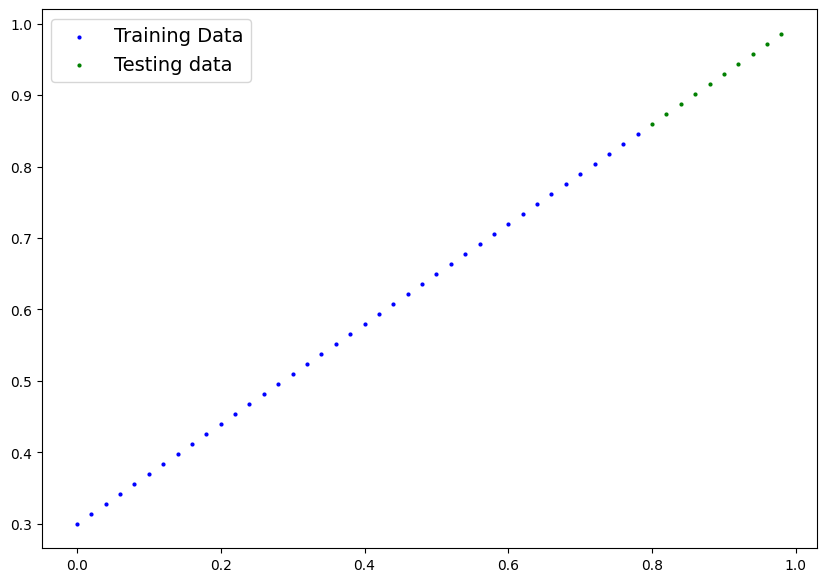

In [6]:
plot_predictions();

## 2. Build Model

Review OOP before moving forward in Python: https://realpython.com/python3-object-oriented-programming/

nn.Module class: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

Model does this:
* Start with random values (weight/bias)
* Look at training data and adjust rando values to better represent ideal values (weight & bias values used to create the data)

Two key algorithms:
1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Back Propogation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [7]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # most things in PyTorch inherit from nn.Module
  def __init__(self): # constructor
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #Already there by default
                                            dtype=torch.float)) # if gradients are going to be computed for this tensor
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias # lin reg formula

### PyTorch Model building essentials

* torch.nn - building blocks for computational graphs (broad category for things like NNs)
* torch.nn.Parameter - what parameters model should try and learn, typically PyTorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where optimizers in PyTorch live, they will help with gradient descent - instead of random values, they will better represent the data - various optimization algorithms wil help improve gradient descent and reduce loss
* def forward() - All nn.Module subclasses require you to overwite forward(), this method defines what happens in forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking contents of PyTorch Model

Check the model parameters or what's inside our model using `.parameters().`


In [8]:
# Create random seed - allows for reproducible results
torch.manual_seed(42)

# Initialize model instance, subclass of nn.Module
model_0 = LinearRegressionModel()

# Examine parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameteres
model_0.state_dict() # start with random numbers, progress to slightly less random nubers

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check predictive power, see how it predicts `y_test` based on `X_test`

In [11]:
# Make predictions with model
with torch.inference_mode():  # Purpose for inference mode is better for gradient-related tracking, turns it off
  y_preds = model_0(X_test)

# with torch.no_grad(): # will also let you make predictions
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

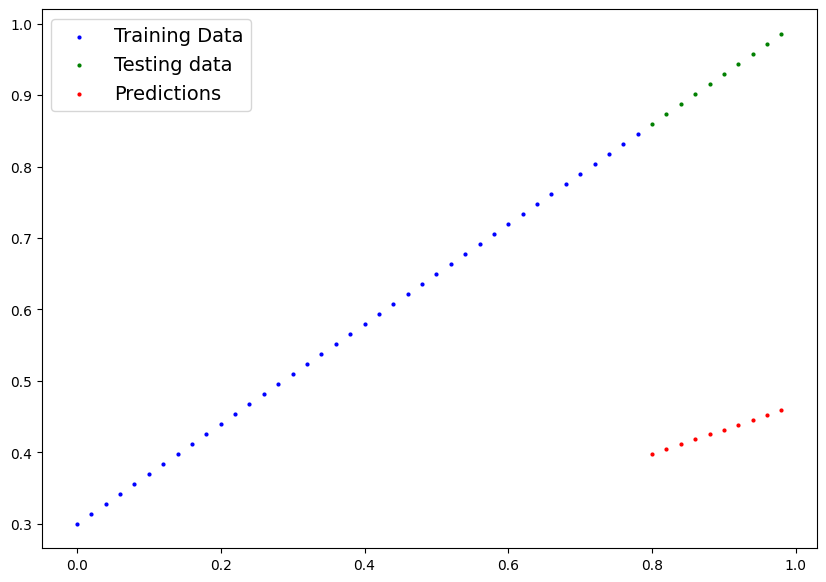

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train model

Purpose of training = going from unknown (possiby random) parameters to known parameters
poor -> good representation of the data

One way to measure how poor or how wrong your models predictions are is the loss function - https://pytorch.org/docs/stable/nn.html#loss-functions

* Loss function can also b ecalled cost function or criterion

Things we need to train:

* **Loss function:** A function to measure how wrong model's predictions are to ideal outputs, lower = better
* **Optimizer:** Accounts loss of model and adjusts parameters which are weights and bias to improve loss function - https://pytorch.org/docs/stable/optim.html
  * Inside optimizer, you'll have two parameters - params which are the model parameters you want to optimize (params=model_0.parameters()) and lr, which is the learning rate hyperparameter
    * Learning rate defines how big/small optimizer changes parameters with each step (small lr results in small changes, large lr results in large changes)

PyTorch specific:
* Training loop
* Testing loop

For classifying problem - loss function of nn.BCELoss() works best, it's really problem specific

In [13]:
list(model_0.parameters())
# Check out model parameters - parameter is value that model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# Setup a loss function
loss_fn = nn.L1Loss() # criterion to measure MAE between input x and target y, ideal loss value is 0

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize parameters present in our model
                            lr=0.01) # lr = learning rate, one hyperparameter you can set

### Building a training/testing loop in PyTorch

Things needed for training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through model's forward functions (data moving from input to output, aka forward propogation)
  * make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through network to calculate gradients of each parameter of model with respect to the loss
  * **backpropogation**
5. Optimizer step - use optiizer to adjust our models' (**gradient descent**)



In [25]:
# An epoch is one loop through the data
epochs = 200

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through data for a number of epochs
for epoch in range(epochs):
  # Set model to training model
  model_0.train() # train mode in PyTorch sets all params that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #predictions first, target next

  # 3. Optimizer zero grad - clears out the gradients that are being tracked
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of loop

  ### Testing
  model_0.eval() # turns off diff settings which aren't needed for testing/evaluation (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking + other things, those things needed during training
    # 1. Do forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if (epoch % 10 == 0):
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      # Print out odel
      print(model_0.state_dict())


Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 10 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 30 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 50 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias',

In [23]:
weight, bias, loss_values, epoch_count

(0.7,
 0.3,
 [tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190

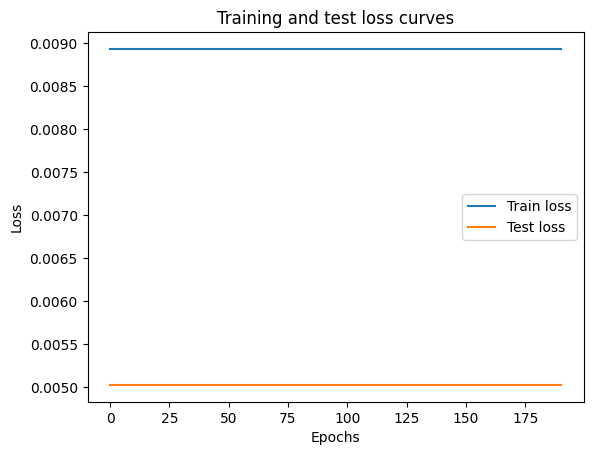

In [26]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


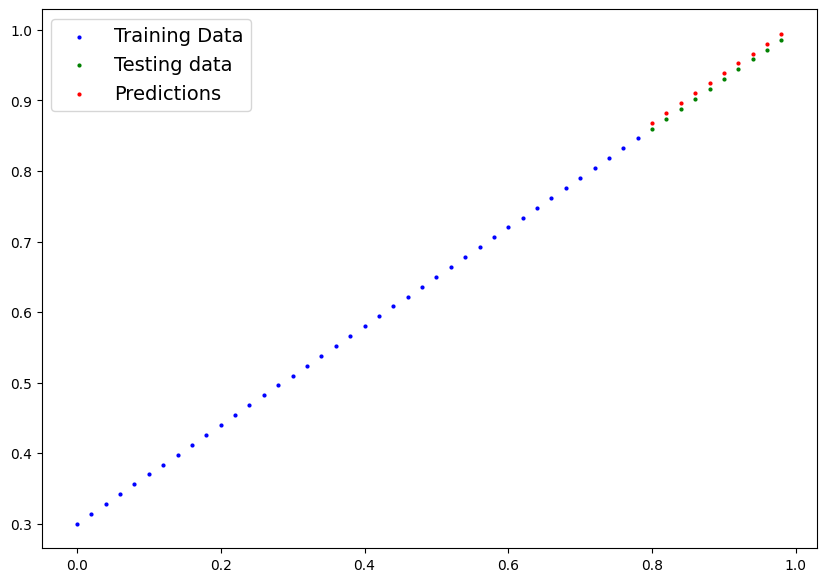

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods for saving/loading models in PyTorch.

1. `torch.save()` - allows you to save PyTorch object in Python pickle forat
2. `torch.load()` 0 allows you to load saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - loads models saved state dictionary

PyTorch save and load models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [27]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [28]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun 29 19:12 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our models state_dict() instead of the whole model, we'll create new instance of model class and load state_dict() into that

In [29]:
# Need new instance of model class to load in saved state_dict
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of the model_0 (this updates new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# Make some preidctions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [34]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [37]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code - if we have access to GPU, use it for faster computing, else use CPU

In [36]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [38]:
# Create some data using lin reg formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range of values
start = 0
end = 1
setp = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # need unsqueeze for diensionality
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

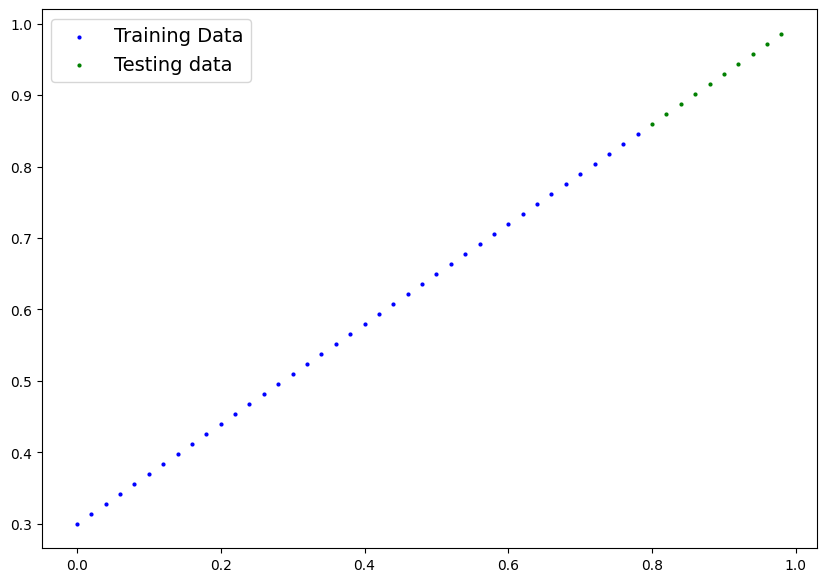

In [39]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Plot the data
plot_predictions(X_train, y_train, X_test, y_test) # Need to define this function or load it in

### 6.2 Build a PyTorch Linear Model

In [40]:
# Create a linear model by subclassing nn.Module
class LRMV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model params / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, #as opposed to initializing params ourself, we'll initialize layers with parameters built in
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1=LRMV2()
model_1, model_1.state_dict()

(LRMV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [45]:
# Check model current device
next(model_1.parameters()).device

device(type='cpu')

In [46]:
# Set the odel to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training/Testing loop

In [47]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [49]:
# Training Loop
torch.manual_seed(42)

epochs = 200

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Optimizer step - perform SGD
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    Test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.008447891101241112
Epoch: 130 | Loss: 0.001264503574930

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 6.4 Making and evaluating predictions

In [51]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

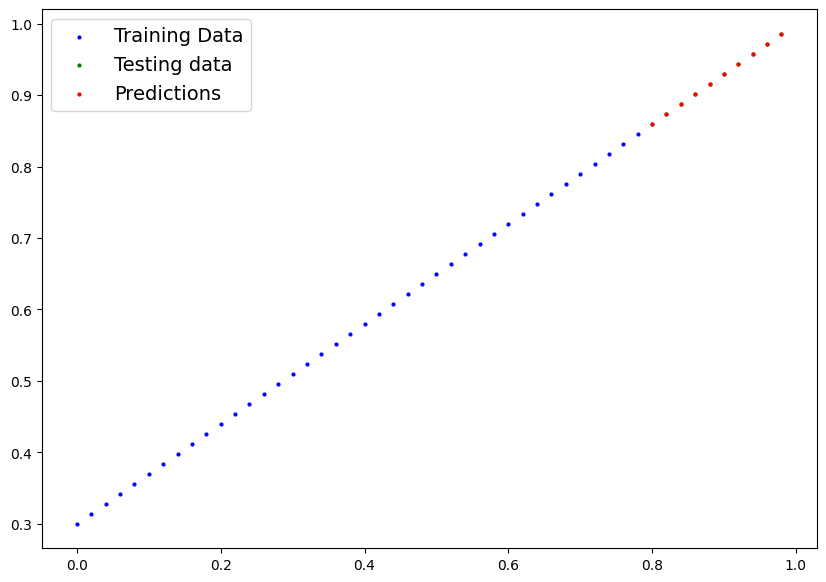

In [53]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and Loading a Trained Model

In [54]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [55]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [56]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LRMV2()

# Load saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put loaded model to device
loaded_model_1.to(device)

LRMV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [58]:
# Evalute oaded odel
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Exercises

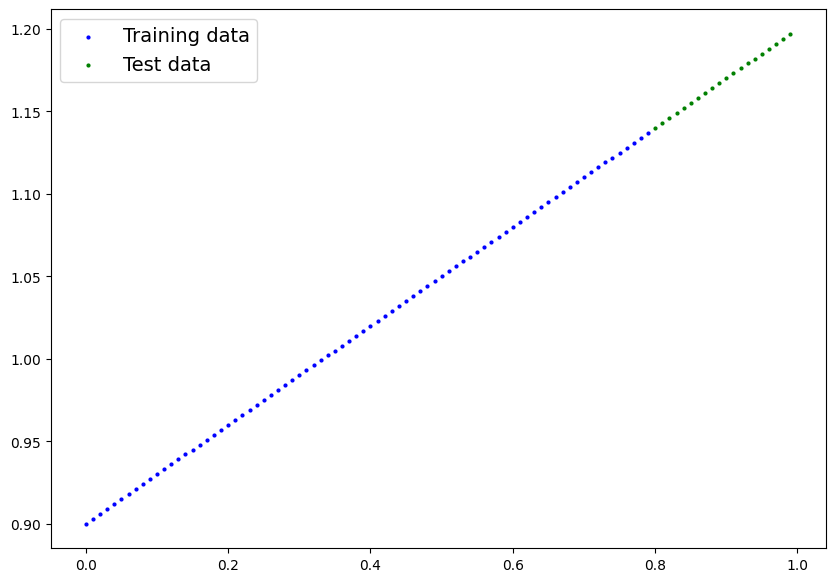

In [59]:
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.01).unsqueeze(dim = 1)
y = weight * X + bias
train_split = int(len(X) * 0.8)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

# Plot the training and testing data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
plot_predictions()

In [60]:
## Option 2
class LRMV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LRMV3()
model_1,model_1.state_dict()


(LRMV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [62]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]